## Imports

In [1]:
import sympy as sym
import numpy as np
from scipy import linalg
import time
import matplotlib.pyplot as plt
import itertools as it
import qutip as qu

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## 2 Level Atom
We'll first consider a two level atom coupled to a cavity mode that we'll be treating quantum mechanically.  We'll use the atom in the ground state and 1 photon in the cavity mode as our initial state.

In [26]:
# Define the initial state
psi0 = qu.tensor(qu.fock(2, 0), qu.fock(2, 1))
print(psi0)

Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


In [27]:
# Define the cavity and atom operators
a = qu.tensor(qu.qeye(2), qu.destroy(2))
σ = qu.tensor(qu.destroy(2), qu.qeye(2))

# Define the Hamiltonian
ωc = 10
ω2 = 85
ω1 = 75
g21 = 5
H = ωc* a.dag() * a + (ω2-ω1) * σ.dag() * σ + g21 * (σ * a.dag() + σ.dag() * a)
print(H)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0. 10.  5.  0.]
 [ 0.  5. 10.  0.]
 [ 0.  0.  0. 20.]]


In [28]:
# Solve the time evolution
t = np.linspace(0, 10, 1000)

result = qu.mesolve(H, psi0, t, [0 * a], [σ.dag() * σ, σ * σ.dag()])

p1 = result.expect[1]
p2 = result.expect[0]

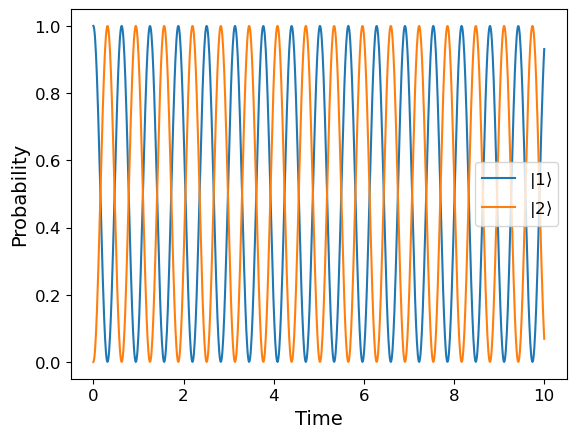

In [29]:
# Plot
plt.plot(t, p1, label='$|1\\rangle$')
plt.plot(t, p2, label='$|2\\rangle$')
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()

## 3 Level

In [7]:
# Define the initial state
psi0 = qu.tensor(qu.fock(3, 0), qu.fock(2, 1))
print(psi0)

Quantum object: dims=[[3, 2], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [8]:
# Define the cavity and atom operators
a = qu.tensor(qu.qeye(3), qu.destroy(2))
σ12 = qu.tensor(qu.Qobj([[0, 0, 0], [0, 0, 1], [0, 0, 0]]), qu.qeye(2))
σi1 = qu.tensor(qu.Qobj([[0, 1, 0], [0, 0, 0], [0, 0, 0]]), qu.qeye(2))

# Define the Hamiltonian
ωc = 10
ω2 = 85
ω1 = 75
ωi = 50
g21 = 10
g1i = 10
H = ωc * a.dag() * a + ω2 * σ12.dag() * σ12 + ω1 * σi1.dag() * σi1 + ωi * σi1 * σi1.dag() + g21 * (σ12 * a.dag() + σ12.dag() * a) + g1i * (σi1.dag() + σi1)
print(σ12)

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [9]:
result = qu.mesolve(H, psi0, t, [0 * σi1], [σ12.dag() * σ12, σi1.dag() * σi1, σi1 * σi1.dag(), a.dag() * a])

p2 = result.expect[0]
p1 = result.expect[1]
pi = result.expect[2]
nc = result.expect[3]

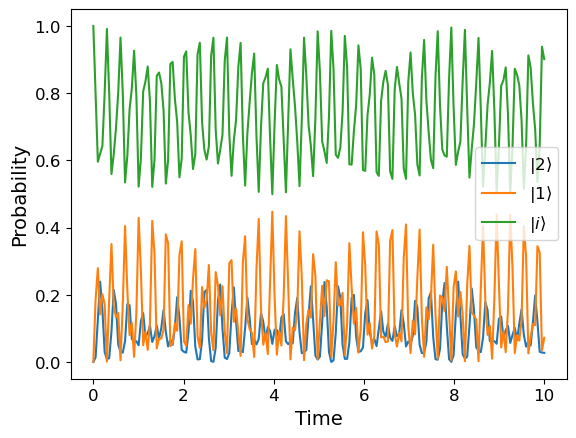

In [10]:
# Plot
plt.plot(t, p2, label='$|2\\rangle$')
plt.plot(t, p1, label='$|1\\rangle$')
plt.plot(t, pi, label='$|i\\rangle$')
#plt.plot(t, 1-nc, label='Cav')
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()

## 4 Level

In [30]:
# Define the initial state
psi0 = qu.tensor(qu.fock(4, 0), qu.fock(2, 1))
print(psi0)

Quantum object: dims=[[4, 2], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [55]:
# Define the cavity and atom operators
a = qu.tensor(qu.qeye(4), qu.destroy(2))
σ12 = qu.tensor(qu.Qobj([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0]]), qu.qeye(2))
σi1 = qu.tensor(qu.Qobj([[0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0]]), qu.qeye(2))
σgi = qu.tensor(qu.Qobj([[0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]), qu.qeye(2))

# Define the Hamiltonian
ωc = 10
ωg = 0
ωi = 385e3
ω1 = ωi + 625e3
ω2 = ω1 + 10
g21 = 1
g1i = 100e3
gig = 100e3
H = ωc * a.dag() * a + ω2 * σ12.dag() * σ12 + ω1 * σi1.dag() * σi1 + ωi * σgi.dag() * σgi + ωg * σgi * σgi.dag()
H += g21 * (σ12 * a.dag() + σ12.dag() * a) + g1i * (σi1.dag() + σi1) + gig * (σgi.dag() + σgi)
print(H)

Quantum object: dims=[[4, 2], [4, 2]], shape=(8, 8), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.00000e+00 0.00000e+00 1.00000e+05 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+01 0.00000e+00 1.00000e+05 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00]
 [1.00000e+05 0.00000e+00 3.85000e+05 0.00000e+00 1.00000e+05 0.00000e+00
  0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+05 0.00000e+00 3.85010e+05 0.00000e+00 1.00000e+05
  0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 1.00000e+05 0.00000e+00 1.01000e+06 0.00000e+00
  0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+05 0.00000e+00 1.01001e+06
  1.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.01001e+06 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.01002e+06]]


In [57]:
result = qu.mesolve(H, psi0, t, [400e3 * σgi, 400e3 * σi1, 400e3 * σ12], [σ12.dag() * σ12, σi1.dag() * σi1, σgi.dag() * σgi, σgi * σgi.dag(), a.dag() * a])

p2 = result.expect[0]
p1 = result.expect[1]
pi = result.expect[2]
pg = result.expect[3]
nc = result.expect[4]

IntegratorException: Excess work done on this call. Try to increasing the nsteps parameter in the Options class

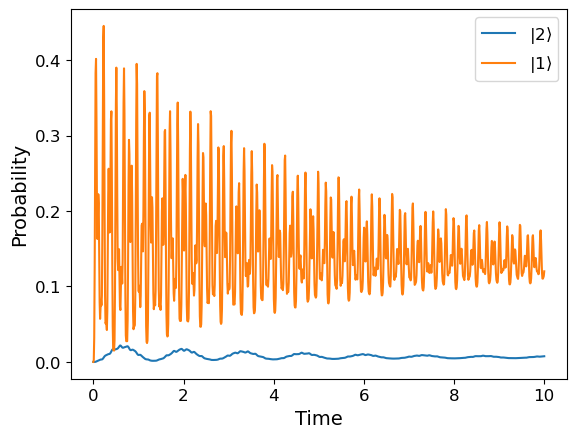

In [54]:
# Plot
plt.plot(t, p2, label='$|2\\rangle$')
plt.plot(t, p1, label='$|1\\rangle$')
#plt.plot(t, pi, label='$|i\\rangle$')
#plt.plot(t, pg, label='$|g\\rangle$')
#plt.plot(t, 1-nc, label='Cav')
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()

Trying to use realistic parameters for the Rydberg system didn't work out too well.  Qutip had a hard time calculating anything at that point.  I think this is where I need to use the collapse operators in the Lindblad master equation, but I need to think about what those should be.

Actually, even using damping rates that are comparable to the frequencies didn't make this any better.  What if we use a 3 level model with more realistic parameters assuming that the intermediate state basically doesn't contribute?

In [58]:
# Define the initial state
psi0 = qu.tensor(qu.fock(3, 0), qu.fock(2, 1))
print(psi0)

Quantum object: dims=[[3, 2], [1]], shape=(6, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [60]:
# Define the cavity and atom operators
a = qu.tensor(qu.qeye(3), qu.destroy(2))
σ12 = qu.tensor(qu.Qobj([[0, 0, 0], [0, 0, 1], [0, 0, 0]]), qu.qeye(2))
σi1 = qu.tensor(qu.Qobj([[0, 1, 0], [0, 0, 0], [0, 0, 0]]), qu.qeye(2))

# Define the Hamiltonian
ωc = 10
ωi = 0
ω1 = 625e3
ω2 = ω1 + 10
g21 = 1
g1i = 1000
H = ωc * a.dag() * a + ω2 * σ12.dag() * σ12 + ω1 * σi1.dag() * σi1 + ωi * σi1 * σi1.dag() + g21 * (σ12 * a.dag() + σ12.dag() * a) + g1i * (σi1.dag() + σi1)
print(H)

Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.0000e+00 0.0000e+00 1.0000e+03 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.0000e+01 0.0000e+00 1.0000e+03 0.0000e+00 0.0000e+00]
 [1.0000e+03 0.0000e+00 6.2500e+05 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.0000e+03 0.0000e+00 6.2501e+05 1.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 6.2501e+05 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 6.2502e+05]]


In [62]:
opts = qu.solver.Options(nsteps=5000)
result = qu.mesolve(H, psi0, t, [0 * σi1], [σ12.dag() * σ12, σi1.dag() * σi1, σi1 * σi1.dag(), a.dag() * a], options=opts)

p2 = result.expect[0]
p1 = result.expect[1]
pi = result.expect[2]
nc = result.expect[3]

/home/jacob/anaconda3/envs/mode_cooling/lib/python3.11/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
/home/jacob/anaconda3/envs/mode_cooling/lib/python3.11/site-packages/qutip/solver/solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/home/jacob/anaconda3/envs/mode_cooling/lib/python3.11/site-packages/scipy/integrate/_ode.py:431: UserWarning: _zvode: Excess work done on this call. (Perhaps wrong MF.)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


IntegratorException: Excess work done on this call. Try to increasing the nsteps parameter in the Options class